# Analysis of the given Stock Data

In [258]:
import pandas as pd
# data = pd.read_excel('sample_data.xls')
data = pd.read_csv('sample_data.csv')
data.head()


,Srno,date,open,high,low,close,volume
0,0,2022-01-03 09:15:00,252.70,254.25,252.35,252.60,319790
1,1,2022-01-03 09:30:00,252.60,253.65,251.75,252.80,220927
2,2,2022-01-03 09:45:00,252.95,254.90,252.30,252.85,526445
3,3,2022-01-03 10:00:00,252.85,253.15,252.40,252.55,280414
4,4,2022-01-03 10:15:00,252.55,253.10,252.25,252.80,112875


## Data PreProcessing

First we will split the date column in 2 columns:
date and time for better understanding and further analysis.
and omit the the unanamed column.

In [259]:
data.drop(['Srno'], axis = 1, inplace = True) # dropping the column

date = []
time = []
for i in data['date']:
    date_time = list(i.split(' '))
    date.append(str(date_time[0]))
    time.append(str(date_time[1]))
    
date = pd.Series(date)
time = pd.Series(time)

data.drop(['date'], axis = 1, inplace = True) # dropping the column
data['date'] = date
data['time'] = time
data.head()

,open,high,low,close,volume,date,time
0,252.70,254.25,252.35,252.60,319790,2022-01-03,09:15:00
1,252.60,253.65,251.75,252.80,220927,2022-01-03,09:30:00
2,252.95,254.90,252.30,252.85,526445,2022-01-03,09:45:00
3,252.85,253.15,252.40,252.55,280414,2022-01-03,10:00:00
4,252.55,253.10,252.25,252.80,112875,2022-01-03,10:15:00


## Data Analysis

Let us have a look at some basic statistics of the dataset

In [260]:
data.describe()

,open,high,low,close,volume
count,2000.000000,2000.000000,2000.000000,2000.000000,2.000000e+03
mean,304.072050,305.112750,303.062375,304.087500,3.995450e+05
std,23.117987,23.129187,23.076869,23.100806,4.938786e+05
min,249.850000,250.150000,249.000000,249.800000,2.229300e+04
25%,293.187500,294.125000,292.112500,293.250000,1.471022e+05
50%,306.525000,307.975000,305.550000,306.675000,2.484240e+05
75%,321.700000,322.500000,320.700000,321.650000,4.841755e+05
max,341.100000,344.600000,340.300000,341.050000,8.346762e+06


The above data precisely shows the basic stats of the dataset, but are thery really useful?
Not Really...
Let us now analyze the data further from the perspective of an Trader


As a trader we tend to know more about a stock by looking at its plot a graph for the abpve columns

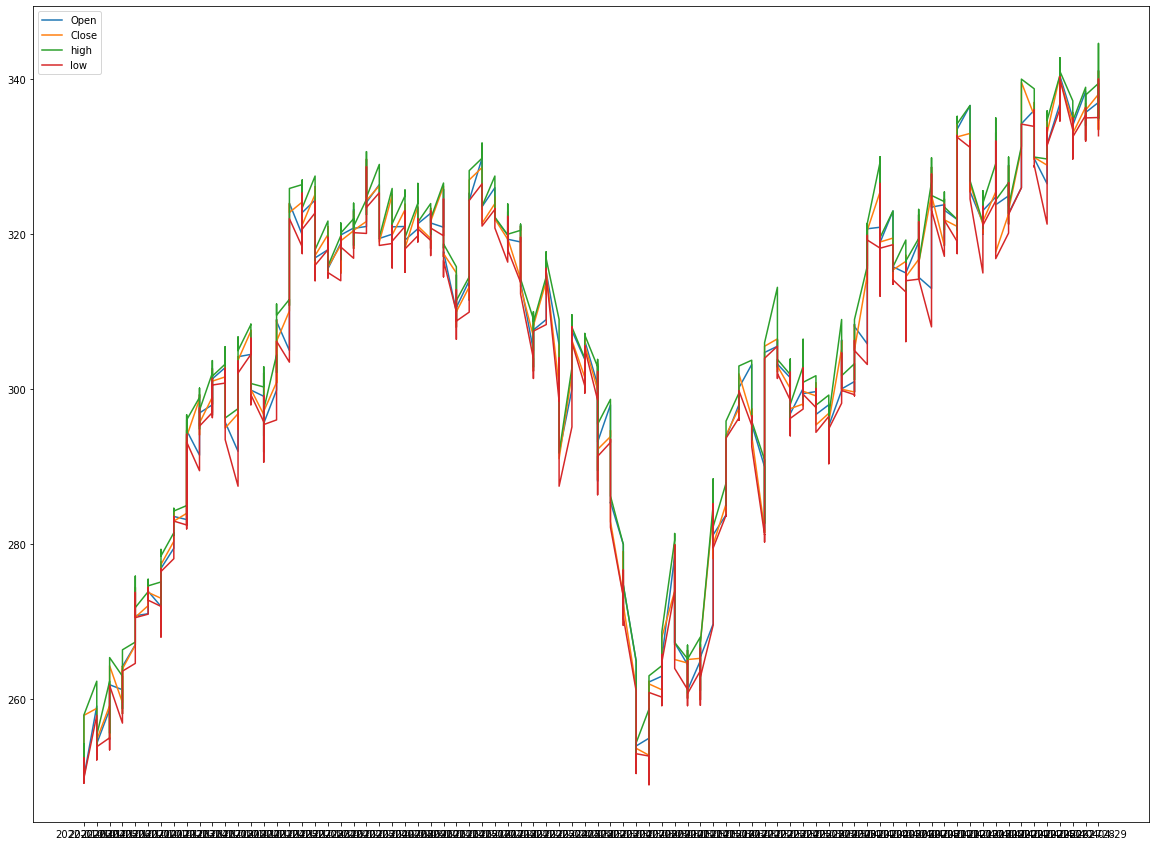

In [261]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (20,15))
plt.plot(data['date'], data['open'])
plt.plot(data['date'], data['close'] )
plt.plot(data['date'], data['high'] )
plt.plot(data['date'], data['low'] )
plt.xlabel = 'Date'
plt.ylabel = 'Price'
plt.legend(['Open', 'Close', 'high', 'low'])

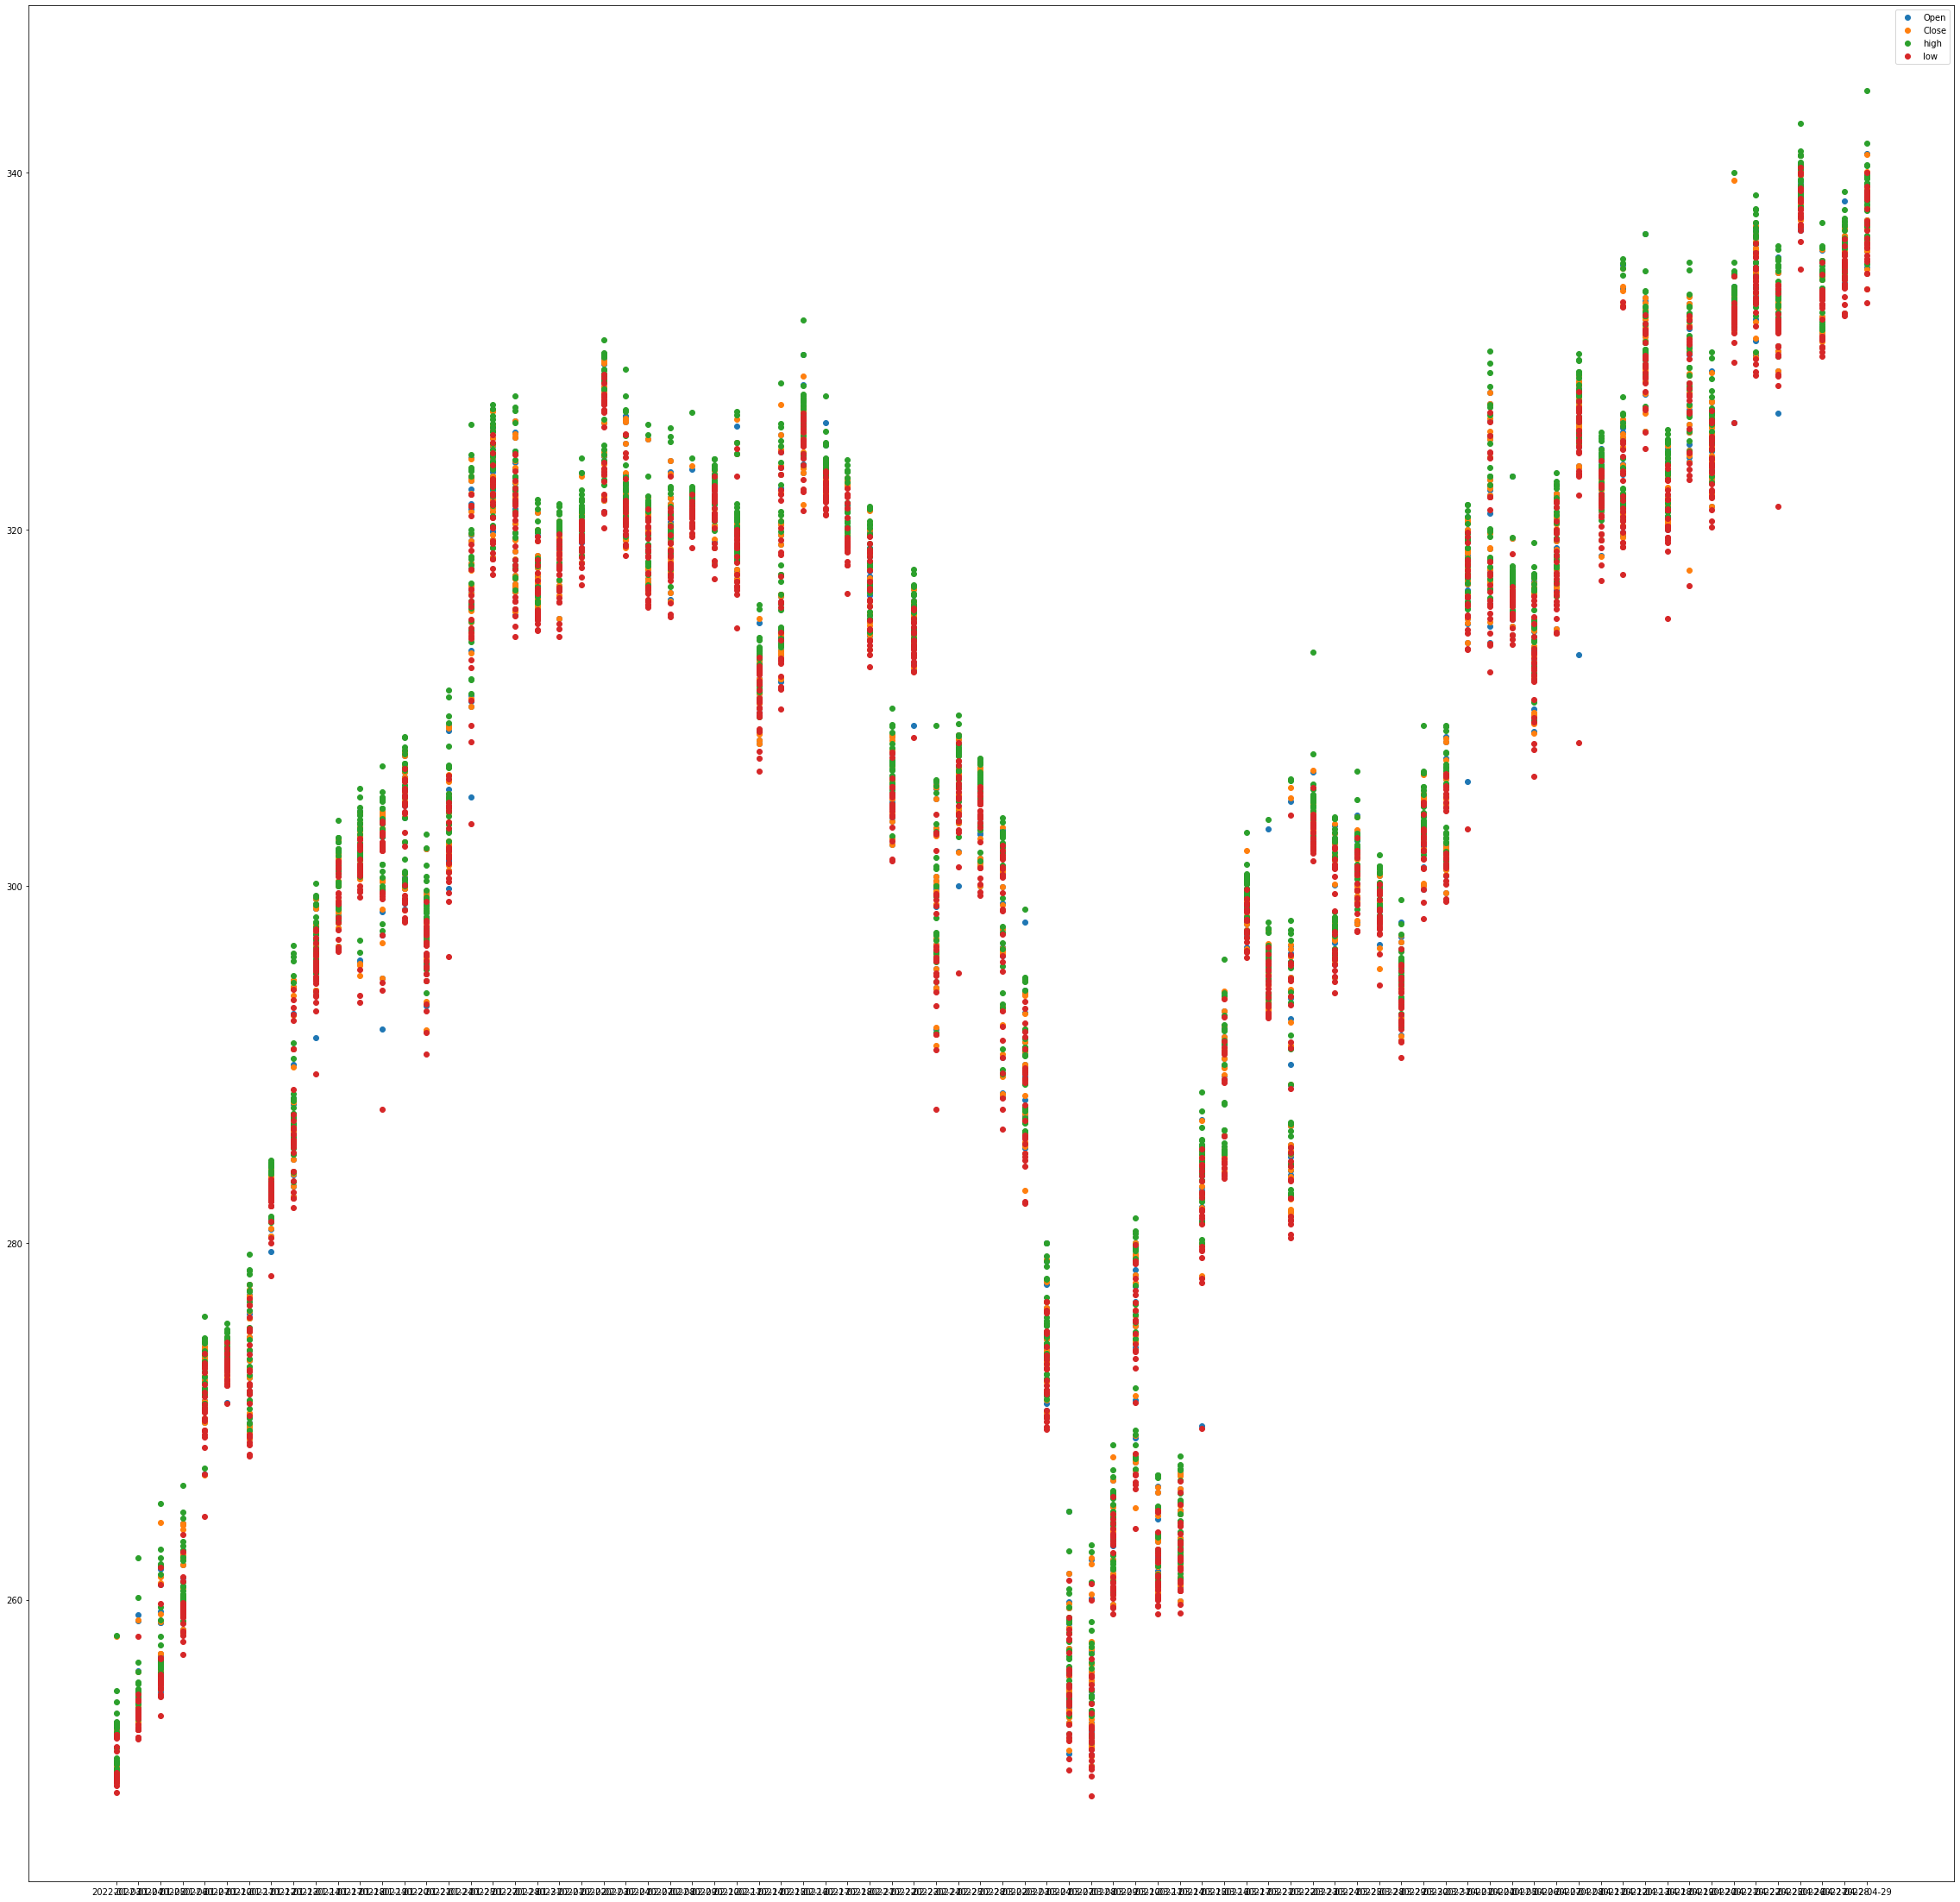

In [262]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (40,40))
plt.plot_date(data['date'], data['open'])
plt.plot_date(data['date'], data['close'] )
plt.plot_date(data['date'], data['high'] )
plt.plot_date(data['date'], data['low'] )
plt.xlabel = 'Date'
plt.ylabel = 'Price'
plt.legend(['Open', 'Close', 'high', 'low'])





Since we have a too many datapoints the x axis looks like this

Based upon the above 2 graphs we can infer that the stock was initially in the bullish trend later it took a resistance and  started  bearish trend for some time and then it again took support from it's previous low, and from that time it is constantly in a bullish trend. It seems like it is also forming some CHANNEL PATTERN after it took suppoet

## Plotting Candlestics

In [263]:
import plotly.graph_objects as go

import pandas as pd
df = data
fig = go.Figure(data=[go.Candlestick(x=df['date'],
                open=df['open'],
                high=df['high'],
                low=df['low'],
                close=df['close'])], layout_xaxis_rangeslider_visible=True)
              

fig.show()

From the above candle chart we can easily infer that the stock took a support at the end of Feb with a big Green candle and then continued it's motion later on 

# What If I Put 1L in this stock ????

In [264]:
buy_time = '09:30:00'
sell_time = '15:00:00'

buytimes = data.loc[data['time'] == buy_time]
selltimes = data.loc[data['time'] == sell_time]

print(buytimes)
print(selltimes)

        open    high     low   close   volume        date      time
1     252.60  253.65  251.75  252.80   220927  2022-01-03  09:30:00
26    258.80  260.10  253.90  254.65  2300353  2022-01-04  09:30:00
51    259.35  259.60  253.50  255.00  2472828  2022-01-05  09:30:00
76    259.60  262.20  258.65  261.95   730028  2022-01-06  09:30:00
101   267.05  271.75  267.05  269.95  1740484  2022-01-07  09:30:00
...      ...     ...     ...     ...      ...         ...       ...
1876  328.90  331.90  328.05  331.15   843810  2022-04-25  09:30:00
1901  340.40  342.75  340.30  341.00  1563299  2022-04-26  09:30:00
1926  334.45  335.10  332.65  334.25   362344  2022-04-27  09:30:00
1951  336.45  336.80  334.70  336.00   275978  2022-04-28  09:30:00
1976  338.25  338.25  336.10  336.10   288298  2022-04-29  09:30:00

[80 rows x 7 columns]
        open    high     low   close   volume        date      time
23    250.20  250.40  249.20  250.10  1190267  2022-01-03  15:00:00
48    253.60  254.65  253

In [265]:
def get_data_from_date(date):
    """
    Date Must me in the format of 'YYYY-MM-DD'
    """
    daily_data = data.loc[data['date'] == date]
    day_open = daily_data['open'].values[0]
    day_close = daily_data['close'].values[-1]
    day_high = daily_data['high'].max()
    day_min = daily_data['low'].min()
    return day_open, day_close, day_high, day_min


Maximum profit will happen in the case at which the stock is bought at the minimum price(day low ) and sold at the maximum price(day high)
Maximum loss will happen in the case at which the stock is bought at the maximum price(day high ) and sold at the minimum price(day low)

In [266]:
def print_stats(open, close, high, low):
    print('____________________Total Profit_____________________')
    buying_price = open
    print("Buying Price: ", buying_price)
    initial_capital = 100000
    buying_quantity = int(initial_capital/float(buying_price))
    print("Buying Quantity: ", buying_quantity)
    selling_price = close
    print("Selling Price: ", selling_price)
    final_capital = buying_quantity*selling_price
    print("Final Capital : ", final_capital)
    profit = final_capital - initial_capital
    print("Total profit",profit)
    print("Profit Percentage: ", ((profit/initial_capital)*100).round(2))
   
    
    print('________________Maximum Achievable Profit__________________')
    min_buying_price = low
    print("Min Buying Price",min_buying_price)
    max_buying_quantity  = int(initial_capital/float(min_buying_price))
    print("Max Buying Quantity: ", max_buying_quantity)
    max_selling_price = high
    print("Max Selling price: ", max_selling_price)
    max_Capital = max_buying_quantity*max_selling_price
    print("Max Capital : ", max_Capital)
    max_profit = max_Capital - initial_capital
    print("Max Profit : ", max_profit)
    max_buying_price = high
    print("Max Profit Percentage: ", ((max_profit/initial_capital)*100).round(2))
    
    print('__________________Maximum Achievable Loss_______________')
    print("Max Buying Price",max_buying_price)
    min_buying_quantity  = int(initial_capital/float(max_buying_price))
    print("Min Buying Quantity: ", min_buying_quantity)
    min_selling_price = low
    print("Min Selling price: ", min_selling_price)
    min_Capital = min_buying_quantity*min_selling_price
    print("Min Capital : ", min_Capital)
    max_loss = min_Capital - initial_capital
    print("Max Loss : ", max_loss*-1)
    print("Max Loss Percentage: ", ((max_loss/initial_capital)*100).round(2))

     

In [267]:
open, close, high, low = get_data_from_date('2022-01-05')
print_stats(open, close, high, low)


____________________Total Profit_____________________
Buying Price:  258.7
Buying Quantity:  386
Selling Price:  264.35
Final Capital :  102039.1
Total profit 2039.1000000000058
Profit Percentage:  2.04
________________Maximum Achievable Profit__________________
Min Buying Price 253.5
Max Buying Quantity:  394
Max Selling price:  265.4
Max Capital :  104567.59999999999
Max Profit :  4567.599999999991
Max Profit Percentage:  4.57
__________________Maximum Achievable Loss_______________
Max Buying Price 265.4
Min Buying Quantity:  376
Min Selling price:  253.5
Min Capital :  95316.0
Max Loss :  4684.0
Max Loss Percentage:  -4.68


Hence All the required fields have been printed, This is a lot doable field and we can add plenty more statistics to it. Such as Moving Average, RSI and other technical indicators. Even We can create our own  custom indicators.